In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = "/home/jovyan/work/workspace/GAN-face-gen/"
IMAGE_DIR = "/home/jovyan/work/workspace/GAN-face-gen/data/face-images/"
PARTITION_FILE = "/home/jovyan/work/workspace/GAN-face-gen/data/list_eval_partition.csv"

In [3]:
Image_dir = "notebook/data/face-imagegen"
Glob_Image_dir1 = glob("/home/jovyan/work/workspace/GAN-face-gen/data/face-images/*")
Glob_Image_dir2 = glob("/home/jovyan/work/workspace/GAN-face-gen/data/img_align_celeba/img_align_celeba/*")
print(len(Glob_Image_dir1))
print(len(Glob_Image_dir2))

184126
183124


In [4]:
partition_file = pd.read_csv(PARTITION_FILE)
partition_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   image_id   202599 non-null  object
 1   partition  202599 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


<BarContainer object of 3 artists>

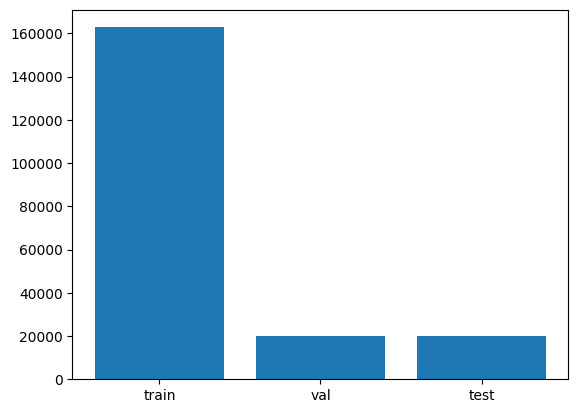

In [5]:
plt.bar(['train', 'val', 'test'], partition_file['partition'].value_counts().values)

In [6]:
image_files = os.listdir(IMAGE_DIR)
image_files = [f for f in image_files if f.endswith(('.jpg', '.png'))]

len(image_files)
asdf = pd.DataFrame(image_files)

In [7]:
train_df = partition_file[partition_file['partition'] == 0]
val_df = partition_file[partition_file['partition'] == 1]
test_df = partition_file[partition_file['partition'] == 2]

train_df.info()
print("============================================\n")
val_df.info()
print("============================================\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162770 entries, 0 to 162769
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   image_id   162770 non-null  object
 1   partition  162770 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19867 entries, 162770 to 182636
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_id   19867 non-null  object
 1   partition  19867 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 465.6+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19962 entries, 182637 to 202598
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_id   19962 non-null  object
 1   partition  19962 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 467.9+ KB


In [8]:
class Dataset(Dataset):
    def __init__(self, img_dir, data, transform=None):
        self.img_dir = img_dir
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image